<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

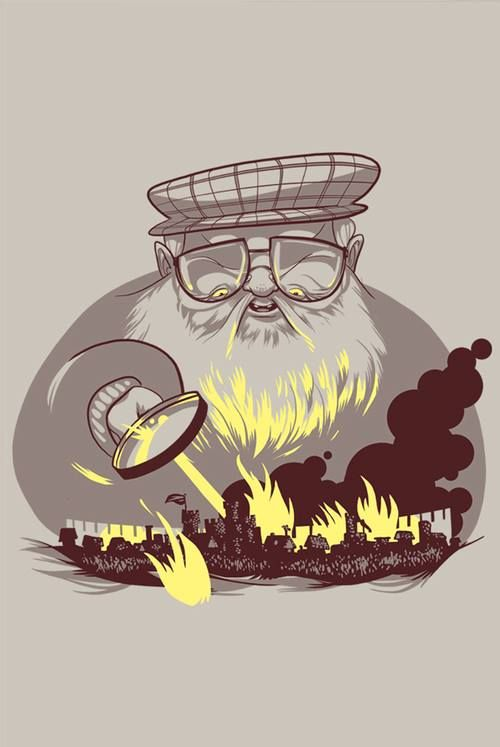

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 71.5MB/s]
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/__main__.py", line 172, in main
    download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 202, in download
    res = sess.get(url, stream=True, verify=verify)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 602, in get
    return self.request("GET", url, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 589, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/adapters.py", line 667, in send


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data1 = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
data2 = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
def fillnas(df: pd.DataFrame) -> None:
    df['dateOfBirth'] = df.dateOfBirth.fillna(df.dateOfBirth.quantile(0.5))
    df['age'] = df['age'].fillna(40)

fillnas(data2)
fillnas(data1)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data1['isPopular']= data1['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data1['boolDeadRelations']= data1['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data1['booked'] = data1.book4 | data1.book5
data1['old'] = data1.dateOfBirth + data1.age < 305
data1['has_title'] = data1.title.notna()
data1['long_name'] = data1.name.str.len() > 8
data1['culture'] = data1['culture'].replace(['summer islands', 'summer islander', 'summer isles'], 'Summer Islands')
data1['culture'] = data1['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'], 'Ghiscari')
data1['culture'] = data1['culture'].replace(["asshai'i", 'asshai'], 'Asshai')
data1['culture'] = data1['culture'].replace(['lysene', 'lyseni'], 'Lysene')
data1['culture'] = data1['culture'].replace(['andal', 'andals'], 'Andal')
data1['culture'] = data1['culture'].replace(['braavosi', 'braavos'], 'Braavosi')
data1['culture'] = data1['culture'].replace(['dornishmen', 'dorne', 'dornish'], 'Dornish')
data1['culture'] = data1['culture'].replace(['myr', 'myrish', 'myrmen'], 'Myrish')
data1['culture'] = data1['culture'].replace(['westermen', 'westerman', 'westerlands'], 'Westermen')
data1['culture'] = data1['culture'].replace(['westeros', 'westerosi'], 'Westerosi')
data1['culture'] = data1['culture'].replace(['stormlands', 'stormlander'], 'Stormlander')
data1['culture'] = data1['culture'].replace(['norvos', 'norvoshi'], 'Norvoshi')
data1['culture'] = data1['culture'].replace(['the north', 'northmen'], 'Northmen')
data1['culture'] = data1['culture'].replace(['wildling', 'first men', 'free folk'], 'Free Folk')
data1['culture'] = data1['culture'].replace(['qartheen', 'qarth'], 'Qartheen')
data1['culture'] = data1['culture'].replace(['the reach', 'reach', 'reachmen'], 'Reach')

data2['isPopular']= data2['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data2['boolDeadRelations']= data2['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data2['booked'] = data2.book4 | data2.book5
data2['old'] = data2.dateOfBirth + data2.age < 305
data2['has_title'] = data2.title.notna()
data2['long_name'] = data2.name.str.len() > 8
data2['culture'] = data2['culture'].replace(['summer islands', 'summer islander', 'summer isles'], 'Summer Islands')
data2['culture'] = data2['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'], 'Ghiscari')
data2['culture'] = data2['culture'].replace(["asshai'i", 'asshai'], 'Asshai')
data2['culture'] = data2['culture'].replace(['lysene', 'lyseni'], 'Lysene')
data2['culture'] = data2['culture'].replace(['andal', 'andals'], 'Andal')
data2['culture'] = data2['culture'].replace(['braavosi', 'braavos'], 'Braavosi')
data2['culture'] = data2['culture'].replace(['dornishmen', 'dorne', 'dornish'], 'Dornish')
data2['culture'] = data2['culture'].replace(['myr', 'myrish', 'myrmen'], 'Myrish')
data2['culture'] = data2['culture'].replace(['westermen', 'westerman', 'westerlands'], 'Westermen')
data2['culture'] = data2['culture'].replace(['westeros', 'westerosi'], 'Westerosi')
data2['culture'] = data2['culture'].replace(['stormlands', 'stormlander'], 'Stormlander')
data2['culture'] = data2['culture'].replace(['norvos', 'norvoshi'], 'Norvoshi')
data2['culture'] = data2['culture'].replace(['the north', 'northmen'], 'Northmen')
data2['culture'] = data2['culture'].replace(['wildling', 'first men', 'free folk'], 'Free Folk')
data2['culture'] = data2['culture'].replace(['qartheen', 'qarth'], 'Qartheen')
data2['culture'] = data2['culture'].replace(['the reach', 'reach', 'reachmen'], 'Reach')
data1
#data1.drop(columns='simlified_culture', inplace=True)
#data2.drop(columns='simlified_culture', inplace=True)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations,booked,old,has_title,long_name
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,0,100.0,0,0.050167,0,0,1,True,False,True
1559,Melisandre,NaN,0,Asshai,267.0,NaN,NaN,NaN,R'hllor,NaN,...,0,40.0,0,0.745819,1,0,1,False,False,True
1560,Merrit,NaN,0,NaN,267.0,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,40.0,0,0.010033,0,0,1,False,False,False
1561,Meryn Trant,Ser,1,NaN,267.0,NaN,NaN,NaN,House Trant,NaN,...,1,40.0,0,0.220736,0,0,1,False,True,True
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,0,38.0,0,0.434783,0,0,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,267.0,NaN,NaN,NaN,House Stark,NaN,...,0,40.0,0,0.351171,0,0,1,False,False,False
1943,Reek,NaN,1,NaN,267.0,NaN,NaN,NaN,House Bolton,NaN,...,0,40.0,0,0.096990,0,0,1,False,False,False
1944,Symeon Star-Eyes,NaN,1,NaN,267.0,NaN,NaN,NaN,NaN,NaN,...,0,40.0,0,0.030100,0,0,1,False,False,True


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
def drop_useless_cols(df: pd.DataFrame) -> None:
    COLUMNS_TO_DROP = [
        'name',
        'mother',
        'father',
        'house',
        'heir',
        'spouse',
        'isAliveMother',
        'isAliveFather',
        'isAliveSpouse',
        'isAliveHeir',
        'culture',
        'title',
        'male',
        'has_title',
        'long_name',

        'book4',
        'book5',
        'isMarried',
        'isNoble',
        'age',
    ]
    df.drop(columns=COLUMNS_TO_DROP, inplace=True)

drop_useless_cols(data1)
drop_useless_cols(data2)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
plt.figure(figsize = (10, 5))

data1['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of Alive')
plt.show()

KeyError: 'isAlive'

<Figure size 1000x500 with 0 Axes>

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data2.columns


Index(['dateOfBirth', 'book1', 'book2', 'book3', 'numDeadRelations',
       'popularity', 'isAlive', 'isPopular', 'boolDeadRelations', 'booked',
       'old'],
      dtype='object')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

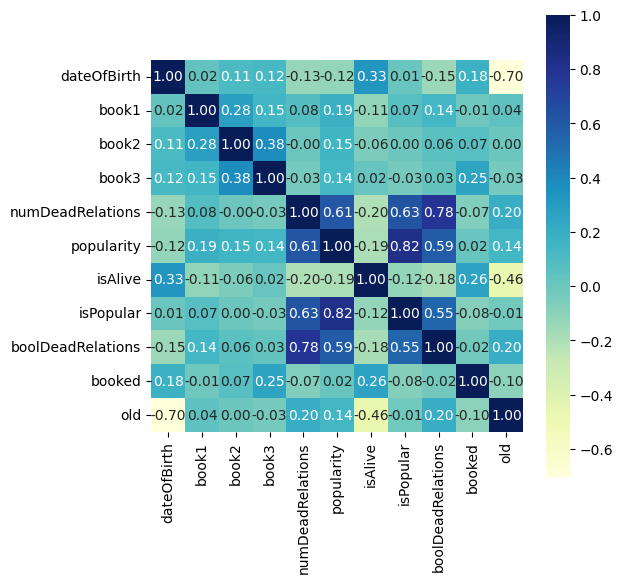

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(data2.corr(), cmap="YlGnBu", fmt=".2f", annot=True, square=True);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data2.drop(columns='isAlive').values
y = data2.isAlive.values

X_control = data1.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_control = scaler.transform(X_control)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [ ]:
MODELS = [
    LogisticRegression(C=1, max_iter=1000, random_state=42),
    RandomForestClassifier(n_jobs=-1, n_estimators=150, random_state=42, max_depth=14),
    AdaBoostClassifier(algorithm='SAMME', random_state=42),
    GaussianNB(),
    KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='rbf', random_state=42),
    GaussianProcessClassifier(n_restarts_optimizer=5, n_jobs=-1, random_state=42),
]

In [ ]:
PREDICTIONS = []
for model in MODELS:
    model_k_accuracies = []
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]

        model.fit(X_train_k, y_train_k)
        y_pred_k = model.predict(X_test_k)
        k_accuracy = accuracy_score(y_test_k, y_pred_k)
        model_k_accuracies.append(k_accuracy)

    train_accuracy = np.mean(model_k_accuracies)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    PREDICTIONS.append((model, train_accuracy, test_accuracy))

PREDICTIONS.sort(key=lambda x: x[2], reverse=True)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
for model, train_accuracy, test_accuracy in PREDICTIONS:
    print(f"{train_accuracy:.4f} / {test_accuracy:.4f}  {model}")

0.8443 / 0.8675  RandomForestClassifier(max_depth=14, n_estimators=150, n_jobs=-1,
                       random_state=42)
0.8458 / 0.8590  AdaBoostClassifier(algorithm='SAMME', random_state=42)
0.8118 / 0.8504  DecisionTreeClassifier(random_state=42)
0.8496 / 0.8333  SVC(random_state=42)
0.8382 / 0.8291  KNeighborsClassifier(n_jobs=-1)
0.8352 / 0.8205  LogisticRegression(C=1, max_iter=1000, random_state=42)
0.8428 / 0.8205  GaussianProcessClassifier(n_jobs=-1, n_restarts_optimizer=5, random_state=42)
0.8337 / 0.8077  GaussianNB()


In [ ]:
# Предсказание на тестовых данных
best_model, train_accuracy, test_accuracy = PREDICTIONS[0]
print(f'{best_model} {test_accuracy:.4f}')

control_pred = best_model.predict(X_control)

RandomForestClassifier(max_depth=14, n_estimators=150, n_jobs=-1,
                       random_state=42) 0.8675


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.81MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
submission.isAlive = control_pred

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)